# Uma terça-feira qualquer

## Introdução
O objetivo deste notebook é mostrar didaticamente como um modelo linear novo para aprendizado de máquina funciona e como ele se difere do modelo linear estudado em sala de aula [1]. Um conjunto de dados foi escolhido usando datasets da biblioteca Seaborn [2] e esse modelo foi treinado em conjunto com um modelo linear múltiplo, comparando os resultados obtidos. A métrica escolhida para análise foi o RMSE [3], e as relações foram representadas por gráficos. Por meio deste, procuramos ajudar Diana a otimizar suas tarefas na Biblioteca Real.

## Desenvolvimento
Importando as bibliotecas necessárias. Os códigos para aprendizado de máquina serão feitos com base no módulo 'Scikit - learn' [4]

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt

O dataset escolhido foi o "Iris" [5], o qual mostra informações sobre espécies de plantas. As variáveis coletadas foram:

- sepal_length:	Comprimento da sépala em centímetros
- sepal_width: Largura da sépala em centímetros
- petal_length:	Comprimento da pétala em centímetros
- petal_width: Largura da pétala em centímetros	
- species: À qual espécie pertence a planta

Vamos visualizar o dataset escolhido:

In [2]:
arquivo = 'iris'

dataset = sns.load_dataset(arquivo)
dataset = dataset.dropna() # remove linhas com células vazia
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Ajustando os atributos e target

Já temos os dados, agora precisamos escolher o que vai ser mais importante para o nosso modelo. Como target - ou seja, o que queremos prever com nosso modelo - escolhemos "petal_width", que é a largura da pétala, e para alcançar nosso target, vamos usar como atributos o comprimento da sépala, a largura da sépala e o comprimento da pétala. Vamos ajustar os dados para nossos atributos e target:

In [3]:
FEATURES = [ 
    'sepal_length',
    'sepal_width',
    'petal_length'
]

TARGET = ["petal_width"]

X = dataset.reindex(FEATURES,axis=1).values
y = dataset.reindex(TARGET, axis=1).values.ravel()

Antes de aplicar os dados no nosso modelo, vamos fixar alguns outros hiperparâmetros. A semente aleatória precisa sempre ser fixada para todo o modelo, então é a primeira coisa que faremos; além disso, vamos decidir quantos dos nossos dados serão reservados para treino, e quantos serão guardados para testar se nosso modelo é bom. Aqui, decidimos que uma boa divisão dos dados seria de 80% para treino e 20% para teste. Vamos aplicar isso:

In [4]:
from sklearn.model_selection import train_test_split

seed = 42 # semente que vai ser usada para que os parâmetros das linhas sejam sempre os mesmos

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=seed) 
# definimos que durante o treino o modelo vai ter acesso a 80% dos dados, enquanto no teste ele vai ter acesso aos 20% dos dados que ainda não conhecia, tentando prever os targets 

In [5]:
X_teste

array([[6.1, 2.8, 4.7],
       [5.7, 3.8, 1.7],
       [7.7, 2.6, 6.9],
       [6. , 2.9, 4.5],
       [6.8, 2.8, 4.8],
       [5.4, 3.4, 1.5],
       [5.6, 2.9, 3.6],
       [6.9, 3.1, 5.1],
       [6.2, 2.2, 4.5],
       [5.8, 2.7, 3.9],
       [6.5, 3.2, 5.1],
       [4.8, 3. , 1.4],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [5.1, 3.8, 1.5],
       [6.3, 3.3, 4.7],
       [6.5, 3. , 5.8],
       [5.6, 2.5, 3.9],
       [5.7, 2.8, 4.5],
       [6.4, 2.8, 5.6],
       [4.7, 3.2, 1.6],
       [6.1, 3. , 4.9],
       [5. , 3.4, 1.6],
       [6.4, 2.8, 5.6],
       [7.9, 3.8, 6.4],
       [6.7, 3. , 5.2],
       [6.7, 2.5, 5.8],
       [6.8, 3.2, 5.9],
       [4.8, 3. , 1.4],
       [4.8, 3.1, 1.6]])

### Modelo - Lasso
O modelo linear escolhido foi o Lasso [7]. Seu diferencial é que ele estima coeficientes esparsos, sendo útil para reduzir o número de atributos e priorizar os que possuem maior peso na previsão do alvo, ou seja, ele analisa qual atributo melhor se enquadra nas previsões e zera os coeficientes dos outros atributos. Um de seus hiperparâmetros - alpha - controla o grau de esparsidade dos coeficientes estimados
 
Matematicamente:
$$\min_{w} \frac{1}{2n_{\text{samples}}} ||Xw - y||_2^2 + \alpha ||w||_1 $$

Assim, o Lasso também estima os coeficientes da regressão linear pelo método dos mínimos quadrados - assim como o modelo linear regressivo -, mas ele possui um termo adicionado: α é uma constante que controla a força da regularização (i.e, quão rígido ele é em escolher o atributo) e ||w||_1 é a norma L1 do coeficiente do vetor i.e, a soma dos coeficientes da matriz. O modelo busca minimizar a norma L1, o que força alguns coeficientes a serem nulos, selecionando as variáveis.

Em questão de parâmetros, ele difere do modelo linear regressivo (ou múltiplo) por alguns parâmetros:
- max_iter: O número máximo de iterações
- tol: A tolerância mínima para a optimização
- warm_start: Valor booleano. Quando True, reusa a solução da chamada anterior para ajustar como inicialização, caso contrário apaga a solução anterior
- random_state: A semente aleatória, responsável por selecionar um atributo aleatório para atualizar. É usado caso selection == 'random'
- selection: Escolhe como os coeficientes serão atualizados. Caso seja 'random', um coeficiente aleatório é atualizado - com base na semente aleatória - a cada iteração ao invés de procurar os atributos sequencialmente e em loop por padrão

In [6]:
from sklearn.linear_model import Lasso

modelo = Lasso(alpha=0.1,warm_start=True) # Valor arbitrário escolhido
modelo.fit(X_treino,y_treino)

y_previsto_lasso = modelo.predict(X_teste)
y_previsto_lasso

array([1.55358825, 0.41239158, 2.39046581, 1.47750847, 1.59162814,
       0.33631181, 1.13514947, 1.70574781, 1.47750847, 1.24926914,
       1.70574781, 0.29827192, 0.26023203, 0.33631181, 0.33631181,
       1.55358825, 1.97202703, 1.24926914, 1.47750847, 1.89594725,
       0.3743517 , 1.62966803, 0.3743517 , 1.89594725, 2.20026636,
       1.7437877 , 1.97202703, 2.01006692, 0.29827192, 0.3743517 ])

De acordo com o enunciado: "Em um conjunto de dados da sua escolha, treine um modelo linear múltiplo e compare o resultado com o modelo linear que você escolheu."

Um modelo de regressão linear múltipla é uma extensão do modelo de regressão linear simples, onde temos mais de uma variável independente. Para isso, vamos treinar o modelo LinearRegression da biblioteca Scikit-learn utilizando o dataset "iris" com os dados adaptados até então. A fórmula [1] por trás do modelo linear múltiplo é a seguinte: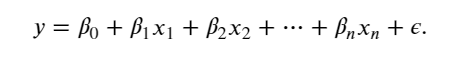

In [7]:
from sklearn.linear_model import LinearRegression

modelo_regressao_lin = LinearRegression()
modelo_regressao_lin.fit(X_treino,y_treino)

y_previsto_regressao_lin = modelo_regressao_lin.predict(X_teste)
y_previsto_regressao_lin

array([1.57353863, 0.30021243, 2.32703544, 1.5136927 , 1.4629906 ,
       0.16926239, 1.12651337, 1.67063212, 1.30170397, 1.19277392,
       1.78792567, 0.16202052, 0.06256521, 0.21561728, 0.33390352,
       1.64464273, 2.11476273, 1.19244303, 1.56037849, 1.98414358,
       0.33949091, 1.72758339, 0.31639618, 1.98414358, 2.29612046,
       1.74732361, 1.94995614, 2.14509931, 0.16202052, 0.29247422])

Após treinar os dois modelos, podemos fazer uma comparação entre eles, e essa comparação levará em conta a métrica RMSE.

In [8]:
# vou conferir a versão instalada do scikit-learn no meu computador, para poder calcular o RMSE:
import sklearn
print(sklearn.__version__)

1.3.2


In [9]:
from sklearn.metrics import mean_squared_error

RMSE_reg = mean_squared_error(y_teste, y_previsto_regressao_lin, squared=False)
RMSE_lasso = mean_squared_error(y_teste, y_previsto_lasso, squared=False)

print(f"O RMSE do modelo de regressão linear foi de {RMSE_reg} unidades de y.")
print(f"O RMSE do modelo linear Lasso foi de {RMSE_lasso} unidades de y.")

O RMSE do modelo de regressão linear foi de 0.21525009483334612 unidades de y.
O RMSE do modelo linear Lasso foi de 0.22749801480609685 unidades de y.


Agora, vamos separar os dados para plotarmos os gráficos, utilizando sempre o target como parâmetro, tanto para os gráficos de Lasso e Regressão Linear, quanto para o gráfico que podemos visulizar todos os dados juntos.

In [10]:
x_comp_sepala = []
x_larg_sepala = [] 
x_comp_petala = []

for i in range(0,len(X_teste)):
    x_comp_sepala.append(X_teste[i][0]) # vai pegar cada elemento na primeira posição de cada linha, referente ao comprimento da sépala
    x_larg_sepala.append(X_teste[i][1]) # vai pegar cada elemento na segunda posição de cada linha, referente à largura da sépala
    x_comp_petala.append(X_teste[i][2]) # vai pegar cada elemento na terceira posição de cada linha, referente ao comprimento da pétala

data_graficos = pd.DataFrame({'Comprimento da sépala': x_comp_sepala, # lista dos valores do comprimento da sépala dos dados de teste
                              'Largura da sépala': x_larg_sepala, # lista dos valores da largura da sépala dos dados de teste
                              'Comprimento da pétala': x_comp_petala, # lista dos valores do comprimento da pétala dos dados de teste
                              'Largura da pétala Lasso': y_previsto_lasso, # valores preditos da largura da pétala pelo modelo Lasso
                              'Largura da pétala Reg. Linear': y_previsto_regressao_lin, # valores preditos da largura da pétala pelo modelo de regressão linear
                              'Largura da pétala teste': y_teste}) # valores reais da largura da pétala nos dados de teste

Nosso dataframe com os dados que serão plotados:

In [11]:
data_graficos

,Comprimento da sépala,Largura da sépala,Comprimento da pétala,Largura da pétala Lasso,Largura da pétala Reg. Linear,Largura da pétala teste
0,6.1,2.8,4.7,1.553588,1.573539,1.2
1,5.7,3.8,1.7,0.412392,0.300212,0.3
2,7.7,2.6,6.9,2.390466,2.327035,2.3
3,6.0,2.9,4.5,1.477508,1.513693,1.5
4,6.8,2.8,4.8,1.591628,1.462991,1.4
5,5.4,3.4,1.5,0.336312,0.169262,0.4
6,5.6,2.9,3.6,1.135149,1.126513,1.3
7,6.9,3.1,5.1,1.705748,1.670632,2.3
8,6.2,2.2,4.5,1.477508,1.301704,1.5
9,5.8,2.7,3.9,1.249269,1.192774,1.2


Vamos visualizar como o alcance do target pelo modelo Lasso varia com a mudança da feature usada. Primeiro, relacionando o comprimento da sépala e a largura da pétala:

Text(0.5, 0.98, 'Lasso')

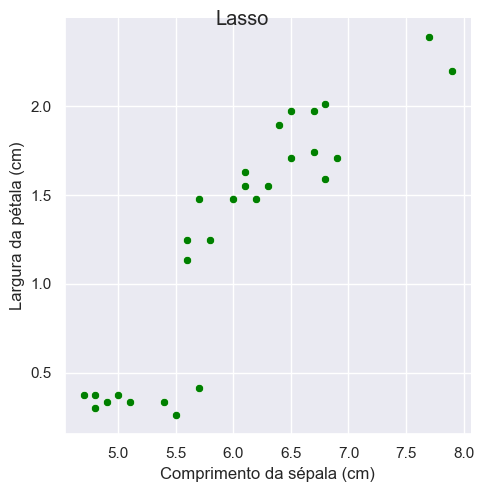

In [12]:
sns.set_theme()
 
grafico_lasso = sns.relplot(
    data=data_graficos,
    x='Comprimento da sépala', y='Largura da pétala Lasso',
    height=5,
    color = 'green'
)

grafico_lasso.set_axis_labels("Comprimento da sépala (cm)", "Largura da pétala (cm)")

grafico_lasso.fig.suptitle('Lasso')

Agora, relacionando a largura da sépala e a largura da pétala:

Text(0.5, 0.98, 'Lasso')

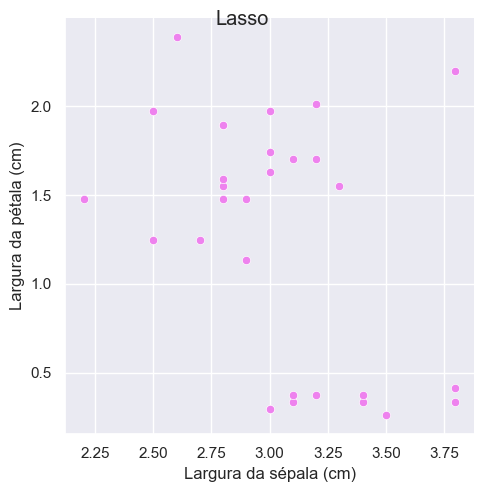

In [13]:
sns.set_theme()
 
grafico_lasso = sns.relplot(
    data=data_graficos,
    x='Largura da sépala', y='Largura da pétala Lasso',
    height=5,
    color = 'violet'
)

grafico_lasso.set_axis_labels("Largura da sépala (cm)", "Largura da pétala (cm)")

grafico_lasso.fig.suptitle('Lasso')

Por fim, relacionando o comprimento da pétala e a largura da pétala:

Text(0.5, 0.98, 'Lasso')

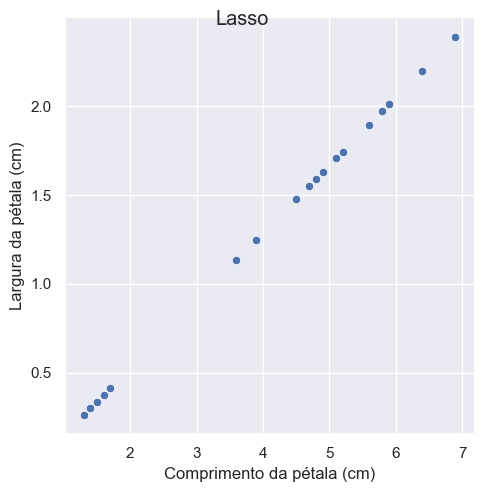

In [14]:
sns.set_theme()
 
grafico_lasso = sns.relplot(
    data=data_graficos,
    x='Comprimento da pétala', y='Largura da pétala Lasso',
    height=5
)

grafico_lasso.set_axis_labels("Comprimento da pétala (cm)", "Largura da pétala (cm)")

grafico_lasso.fig.suptitle('Lasso')

Para finalizar, vamos visualizar como o alcance do target pelo modelo de regressão linear varia com a mudança da feature usada. Relacionando o comprimento da pétala e a largura da pétala:

Text(0.5, 0.98, 'Reg. Linear')

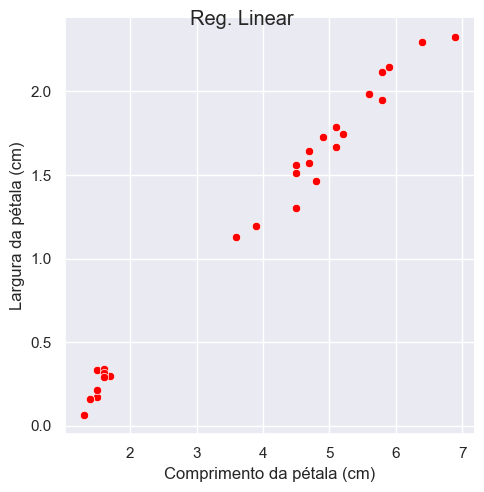

In [15]:
sns.set_theme()
 
grafico_lasso = sns.relplot(
    data=data_graficos,
    x='Comprimento da pétala', y='Largura da pétala Reg. Linear',
    height=5,
    color = 'red'
)

grafico_lasso.set_axis_labels("Comprimento da pétala (cm)", "Largura da pétala (cm)")

grafico_lasso.fig.suptitle('Reg. Linear')

Agora, vamos fazer uma comparação visual entre os dois RMSE:

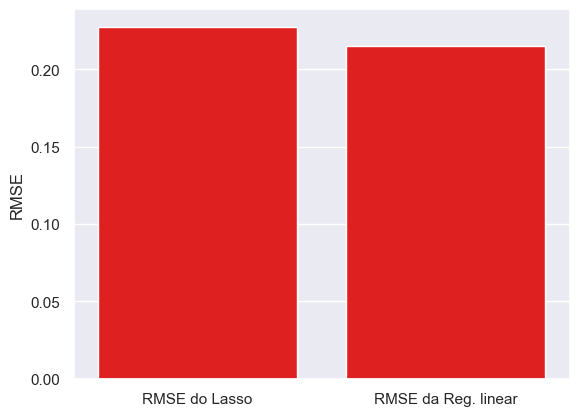

In [16]:
eixo = sns.barplot(x=['RMSE do Lasso','RMSE da Reg. linear'], y=[RMSE_lasso,RMSE_reg], color="RED")

eixo.set_ylabel("RMSE");

Visto todos os dados e gráficos realizados até então, podemos relacionar visualmente os resultados alcançados pelo modelo Lasso, pelo modelo de Regressão Linear e os dados reais dos resultados (ou seja, os targets do teste). Para fazer isso, separamos por index os resultados, ou seja, o resultado real 1, o resultado do Lasso 1 e o resultado de regressão linear 1, e assim por diante. Então por fim, teremos 30 divisões verticais no eixo X do gráfico, dentro das quais ficarão as bolinhas que são os resultados alcançados e o real, e as cores representam cada modelo. Vamos visualizar: 

Text(0, 0.5, 'Largura da pétala (cm)')

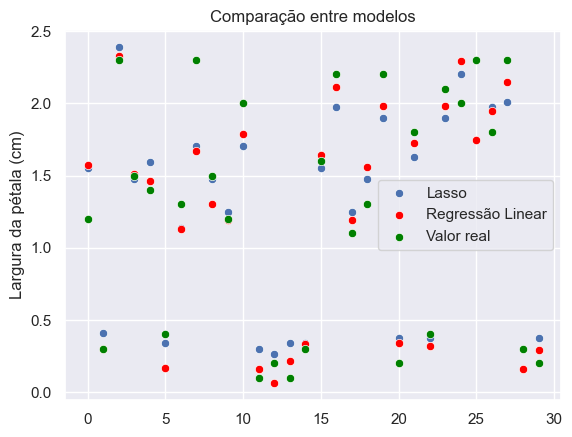

In [17]:
sns.set_theme() 

# separando o que vai entrar no gráfico:
grafico_resultados = (sns.scatterplot(data=data_graficos,x = data_graficos.index, y='Largura da pétala Lasso', label='Lasso'),
sns.scatterplot(data=data_graficos,x = data_graficos.index, y='Largura da pétala Reg. Linear', label='Regressão Linear', color ='red'),
sns.scatterplot(data=data_graficos,x = data_graficos.index, y='Largura da pétala teste', label='Valor real', color = 'green'))

# legendas e nomes:
plt.title("Comparação entre modelos")
plt.xlabel("")
plt.ylabel("Largura da pétala (cm)")

## Conclusão

Com a realização da missão, obtivemos XP em Enfrentamento de Monstros de Biblioteca (experiência em comparação de modelos lineares), e melhoramos nossas habilidades em Feitiços de Visualização (plotagem de gráficos). Com o decorrer das atividades propostas por Dra. Diana Didatolov, podemos perceber que na maioria das vezes o modelo Lasso se aproxima dos resultados alcançados pelo modelo linear múltiplo escolhido (regressão linear) e ambos são bons preditores de target, como observado no último gráfico e no baixo valor do RMSE. Antes de chegarmos ao notebook final, fizemos os mesmos cálculos, treinos e testes presentes, mas com o dataset "tips", e por meio deste percebemos que o modelo Lasso não funcionava tão bem quando tínhamos atributos com mais de uma casa de diferença no seu valor. Logo, utilizamos atributos que estavam na mesma escala, para que pudéssemos fazer uma comparação satisfatória. Chegamos a conclusão que o modelo Lasso nem sempre otimiza a utilização dos dados, e ele pode acabar zerando alguns parâmetros que podem se mostrar necessários para o funcionamento do modelo, de acordo com o peso que eles representam durante o funcionamento.

## Referências

[1] Cassar, Daniel - Material de aula: 'ATP-203 3.0 - Modelo linear e baseline.ipynb'

[2] Github com os datasets didáticos do módulo 'Seaborn': https://github.com/mwaskom/seaborn-data 

[3] Cassar, Daniel - Material de aula: 'ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas.ipynb'

[4] Modelos lineares do Scikit - Learn: https://scikit-learn.org/stable/api/sklearn.linear_model.html

[5] Dados do dataset escolhido: https://rdrr.io/cran/reshape2/man/tips.html

[6] Cassar, Daniel - Material de aula: 'LMA-203 1.0 - Estatística descritiva.ipynb'

[7] Cassar, Daniel - Material de aula: 'ATP-203 1.1 - Tratamento de dados.ipynb'

[8] Modelo Linear escolhido: https://scikit-learn.org/stable/modules/linear_model.html#lasso

[9] Gráfico do Seaborn: https://seaborn.pydata.org/generated/seaborn.scatterplot.html#